## Contents
#### 1. Import libraries and cleaned data
#### 2. Exploratory analysis
#### 3. Correlation matrix heatmap
#### 4. Scatterplot 
#### 5. Pair plot
#### 6. Categorical plot
#### 7. Answering Questions
#### 8. Additional hypotheses

## 1. Import libraries and cleaned data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [18]:
#create path
path = r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement6\Achievement6-Project'

In [19]:
# Import cleaned data
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Air_Traffic_Cargo_Statistics_cleaned.pkl'))

In [20]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,last_update,upload_date
0,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,20-11-2023 07:01,20-11-2023 07:02
1,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,20-11-2023 07:01,20-11-2023 07:02
2,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,20-11-2023 07:01,20-11-2023 07:02
3,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,20-11-2023 07:01,20-11-2023 07:02
4,199907,01-07-1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,20-11-2023 07:01,20-11-2023 07:02


## 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

Question 1:
How do the cargo weights vary across different types of cargo and airlines, and which airlines
handle the highest average cargo weights?

Required variables: Cargo Weight LBS, Cargo Metric TONS, Operating Airline, Cargo Type Code, Cargo Aircraft Type

Question 2:
When analyzing the activity periods, what seasonal patterns emerge in air cargo operations, 
and how do these patterns vary across different geographic regions?

Required variables: Activity Period Start Date, last_update, GEO Summary, GEO Region, Cargo Weight LBS, Cargo Metric TONS, Operating Airline, 
Cargo Type Code

Question 3:
Where are the busiest air cargo hubs located geographically, and how does the volume of
cargo differ between these hubs throughout the year?

Required variables: GEO Region, Cargo Weight LBS, Cargo Metric TONS, last_update, Activity Type Code

## 3. Create a correlation matrix heatmap

In [21]:
#create a subset with numerical variables only
df_sub = df[['Activity Period', 'Cargo Weight LBS', 'Cargo Metric TONS']]

In [22]:
df_sub.corr()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS
Activity Period,1.000000,-0.036333,-0.036333
Cargo Weight LBS,-0.036333,1.000000,1.000000
Cargo Metric TONS,-0.036333,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

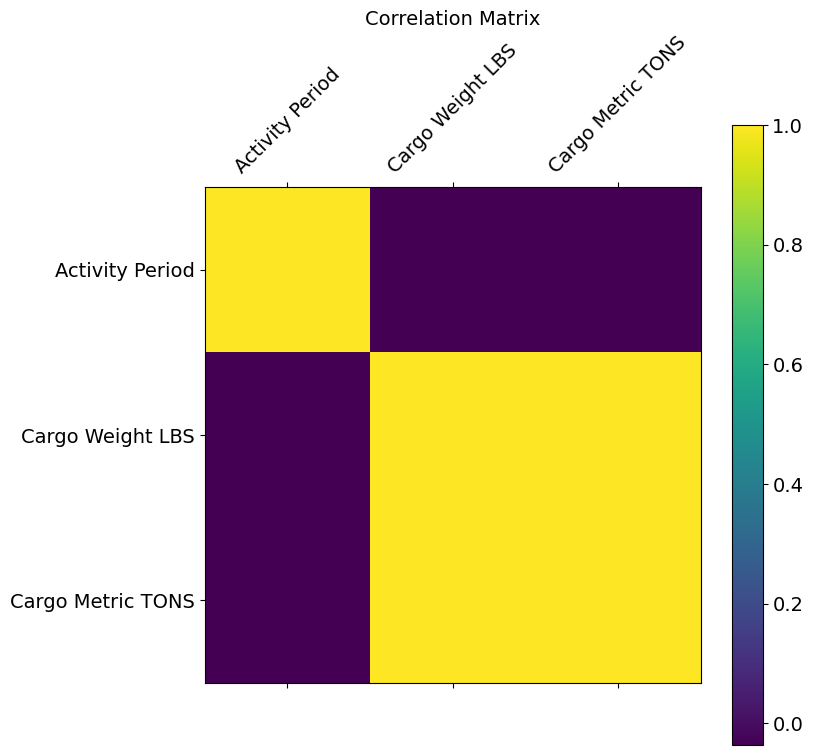

In [23]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

The correlation between Cargo Weight LBS and Cargo Metric TONS is 1 which is not surprising because those two units are weight 
units and can be converted into each other.

There is a very small negative correlation between the Activity Period and both weight units which is close to 0. This indicates no relatioship.

## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

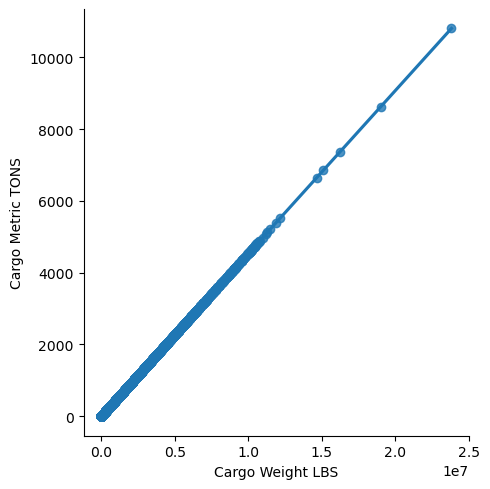

In [24]:
sns.lmplot(x = 'Cargo Weight LBS', y = 'Cargo Metric TONS', data = df_sub)

### Discuss the output in a markdown cell

As discussed in the step 3 both units are convertible into each other. Therefore it's not surprising that the result is a
straight line fitting all points.

## 5. Create a pair plot of the entire data set

C:\Users\Christian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Christian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


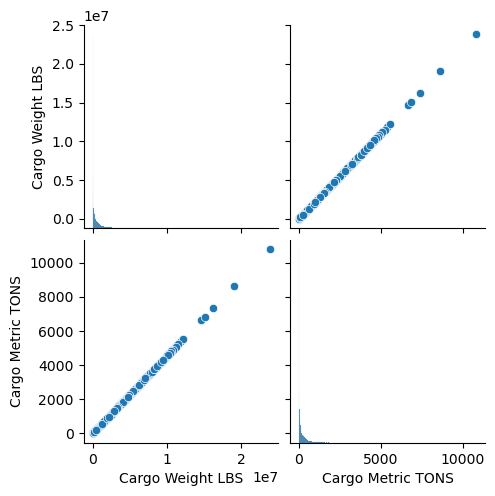

In [25]:
g = sns.pairplot(df)

### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why

This graph shows only the distribution of the numerical variables Cargo Weight LBS and Cargo Metric TONS. As in the prevoius step the scatterplots show the relationship between the two weight units. 
The other two graphs show an exponential decrease. This would mean that there are many hubs which handle a small amount of cargo while there are only a few very big hubs.

Furthermore all variables except IATA codes will be explored because they are relevant to the questions that I defined in the previous task.

C:\Users\Christian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


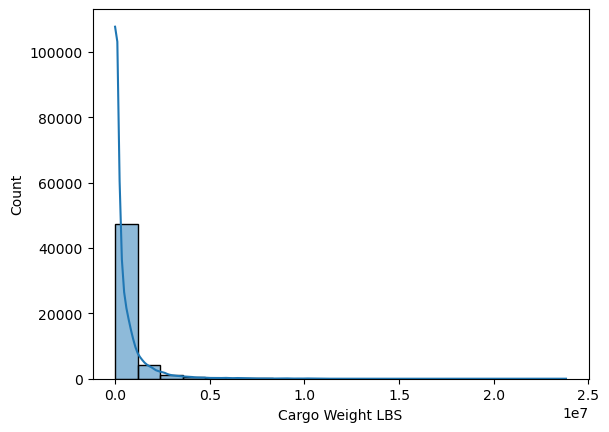

In [77]:
h = sns.histplot(df['Cargo Weight LBS'], bins = 20, kde = True)

## 6. Create a categorical plot and interpret the results

C:\Users\Christian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Christian\AppData\Local\Temp\ipykernel_9864\206507294.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(c.get_xticklabels(), rotation=90)


[Text(0, 0, 'US'),
 Text(1, 0, 'Europe'),
 Text(2, 0, 'Canada'),
 Text(3, 0, 'Asia'),
 Text(4, 0, 'Mexico'),
 Text(5, 0, 'Central America'),
 Text(6, 0, 'Australia / Oceania'),
 Text(7, 0, 'Middle East'),
 Text(8, 0, 'South America')]

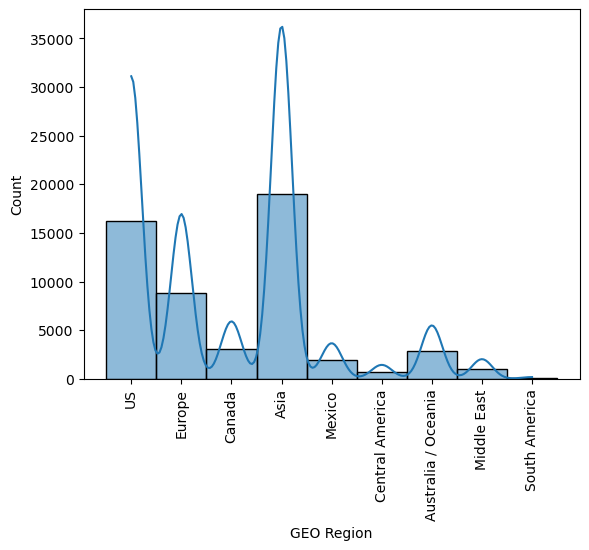

In [26]:
c = sns.histplot(df['GEO Region'], bins = 20, kde = True)
c.set_xticklabels(c.get_xticklabels(), rotation=90) 

The resulting plot shows the count of hubs across different regions in the world. The biggest hub is Asia followed by US and Europe.

## 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

In [27]:
# Question 1: How do the cargo weights vary across different types of cargo and airlines, and which airlines handle the highest average cargo weights?
# Required variables: Cargo Weight LBS, Cargo Metric TONS, Operating Airline, Cargo Type Code, Cargo Aircraft Type

In [32]:
df.groupby('Operating Airline').agg({'Cargo Weight LBS':['mean']}).sort_values(by=('Cargo Weight LBS', 'mean'), ascending=False)

,Cargo Weight LBS
,mean
Operating Airline,
"Air Transport International, Inc.",3.968055e+06
Federal Express,3.912843e+06
Focus Air,2.620476e+06
"Atlas Air, Inc",2.421957e+06
ABX Air,1.722398e+06
...,...
Trans States Airlines,1.317778e+02
Atlantic Southeast Airlines,5.350000e+01


The top 5 airlines handling the highest average cargo weights are Air Transport International, Inc., Federal Express,	
Focus Air, Atlas Air, Inc  andABX Air

In [38]:
df.groupby('Cargo Type Code').agg({'Cargo Weight LBS':['mean']}).sort_values(by=('Cargo Weight LBS', 'mean'), ascending=False)

,Cargo Weight LBS
,mean
Cargo Type Code,
Cargo,744617.780988
Express,319503.812692
Mail,207877.302353


In [39]:
df.groupby(['Operating Airline', 'Cargo Type Code']).agg({'Cargo Weight LBS':['mean']}).sort_values(by=('Cargo Weight LBS', 'mean'), ascending=False)

,,Cargo Weight LBS
,,mean
Operating Airline,Cargo Type Code,
Federal Express,Cargo,4.709098e+06
"Air Transport International, Inc.",Cargo,3.968055e+06
Focus Air,Cargo,2.620476e+06
"Atlas Air, Inc",Cargo,2.421957e+06
Kitty Hawk Air Cargo,Mail,2.191706e+06
...,...,...
American Eagle Airlines,Express,2.000000e+01
Air Canada Jazz,Cargo,1.300000e+01


On average the type 'Cargo' is the haviest and is handled by Federal Express while Kitty Hawk Air Cargo handles the most Mail on average.

In [40]:
#Question 2: When analyzing the activity periods, what seasonal patterns emerge in air cargo operations, and how do these patterns vary across different geographic regions?
#Required variables: Activity Period Start Date, last_update, GEO Summary, GEO Region, Cargo Weight LBS, Cargo Metric TONS, Operating Airline, Cargo Type Codeaa

In [50]:
#  Aggregate Data
grouped_df = df.groupby(['Activity Period Start Date', 'GEO Region']).agg({'Cargo Weight LBS': 'sum'}).reset_index()

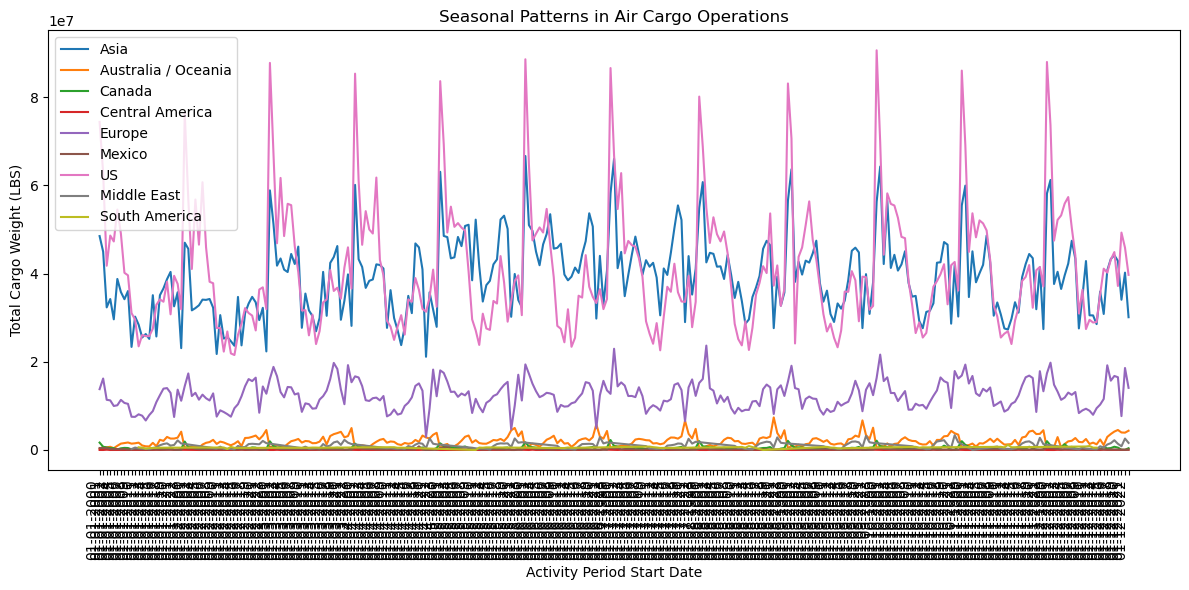

In [55]:
# Visualize Seasonal Patterns
plt.figure(figsize=(12, 6))
for region in grouped_df['GEO Region'].unique():
    region_data = grouped_df[grouped_df['GEO Region'] == region]
    plt.plot(region_data['Activity Period Start Date'], region_data['Cargo Weight LBS'], label=region)

plt.title('Seasonal Patterns in Air Cargo Operations')
plt.xlabel('Activity Period Start Date')
plt.ylabel('Total Cargo Weight (LBS)')
plt.xticks(rotation=90, ha='right')  # Rotate labels to 45 degrees and align them to the right
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

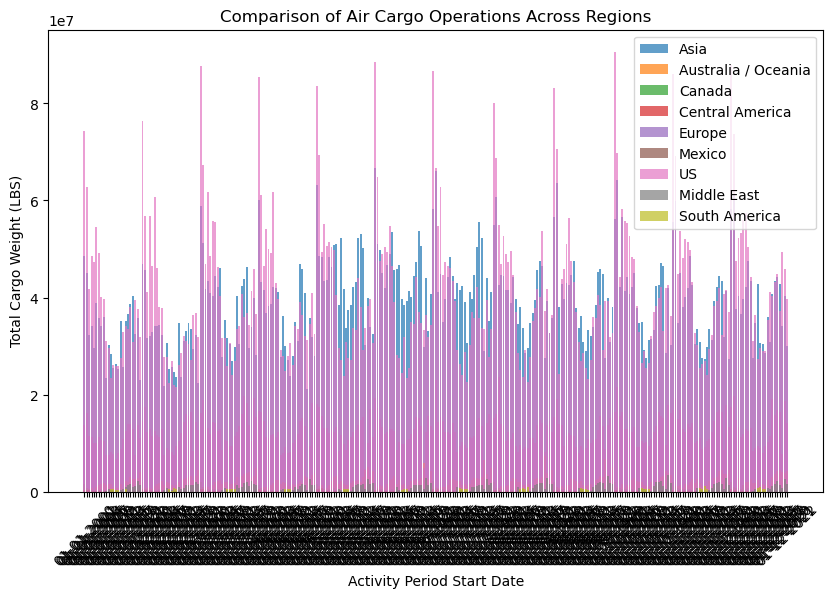

In [53]:
# Compare Across Regions
plt.figure(figsize=(10, 6))
for region in grouped_df['GEO Region'].unique():
    region_data = grouped_df[grouped_df['GEO Region'] == region]
    plt.bar(region_data['Activity Period Start Date'], region_data['Cargo Weight LBS'], label=region, alpha=0.7)

plt.title('Comparison of Air Cargo Operations Across Regions')
plt.xlabel('Activity Period Start Date')
plt.ylabel('Total Cargo Weight (LBS)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [61]:
# Convert 'Activity Period Start Date' to datetime
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'], format='%d-%m-%Y')

In [62]:
# Filter Data for Years 2016 and 2017
filtered_df = df[(df['Activity Period Start Date'].dt.year == 2016) | (df['Activity Period Start Date'].dt.year == 2017)]

In [63]:
# Aggregate Data
grouped_df = filtered_df.groupby(['Activity Period Start Date', 'GEO Region']).agg({'Cargo Weight LBS': 'sum'}).reset_index()

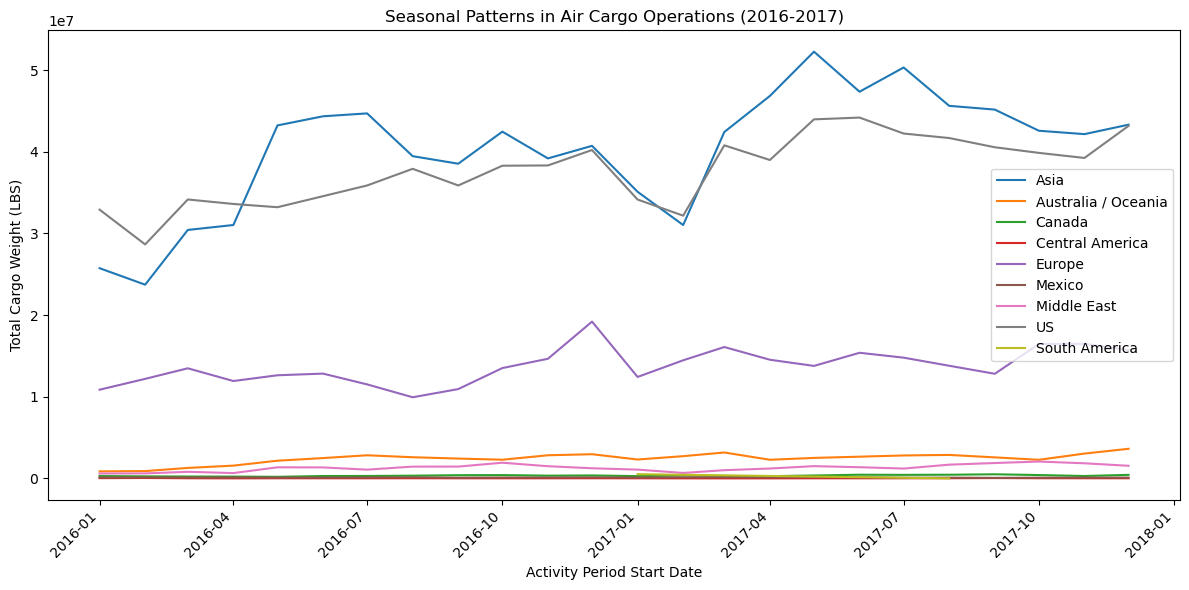

In [64]:
# Visualize Seasonal Patterns
plt.figure(figsize=(12, 6))
for region in grouped_df['GEO Region'].unique():
    region_data = grouped_df[grouped_df['GEO Region'] == region]
    plt.plot(region_data['Activity Period Start Date'], region_data['Cargo Weight LBS'], label=region)

plt.title('Seasonal Patterns in Air Cargo Operations (2016-2017)')
plt.xlabel('Activity Period Start Date')
plt.ylabel('Total Cargo Weight (LBS)')
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align them to the right
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

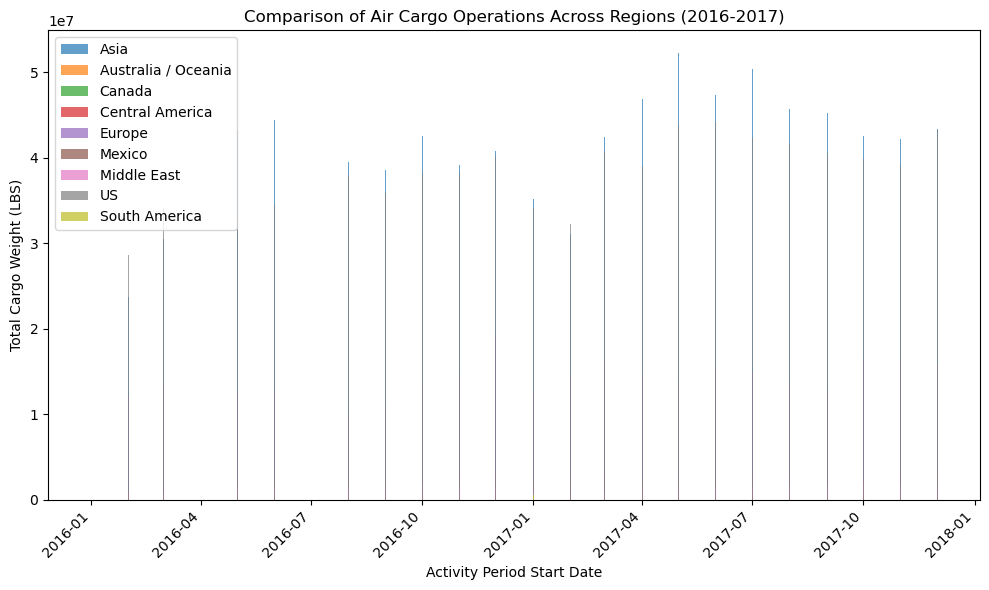

In [66]:
# Compare Across Regions
plt.figure(figsize=(10, 6))
for region in grouped_df['GEO Region'].unique():
    region_data = grouped_df[grouped_df['GEO Region'] == region]
    plt.bar(region_data['Activity Period Start Date'], region_data['Cargo Weight LBS'], label=region, alpha=0.7)

plt.title('Comparison of Air Cargo Operations Across Regions (2016-2017)')
plt.xlabel('Activity Period Start Date')
plt.ylabel('Total Cargo Weight (LBS)')
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees and align them to the right
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The graphs above show a periodical pattern in cargo operations. There are minima and maxima. But looking at particular years does not show
any clear pattern. 

In [67]:
# Question 3: Where are the busiest air cargo hubs located geographically, and how does the volume of cargo differ between these hubs throughout the year?
# Required variables: GEO Region, Cargo Weight LBS, Cargo Metric TONS, last_update, Activity Type Code

In [68]:
# Aggregate Data to Identify Busiest Air Cargo Hubs
hub_volume = df.groupby('GEO Region')['Cargo Weight LBS'].sum().sort_values(ascending=False)

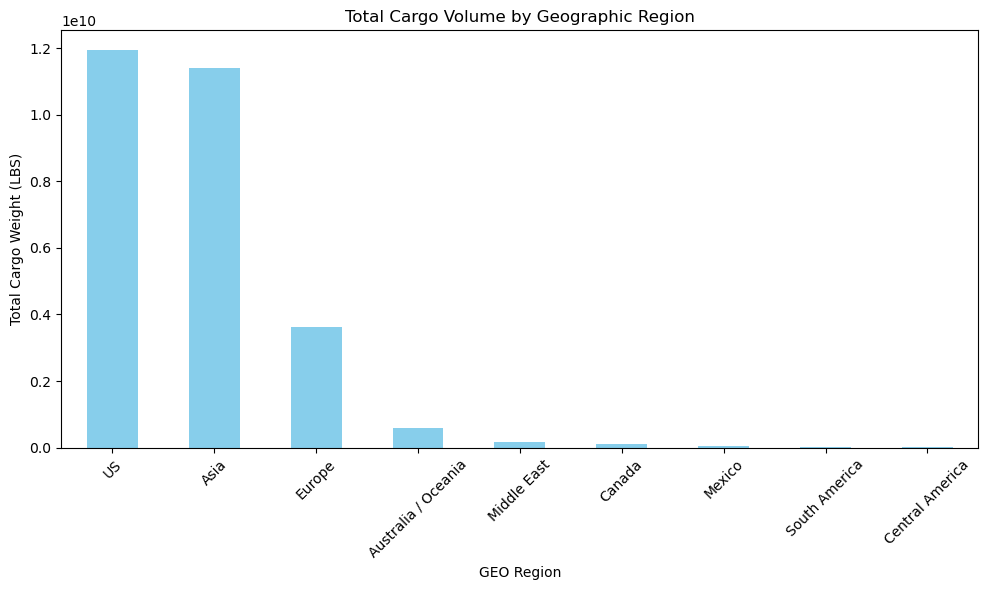

In [69]:
#  Visualize Geographic Locations of Busiest Hubs
plt.figure(figsize=(10, 6))
hub_volume.plot(kind='bar', color='skyblue')
plt.title('Total Cargo Volume by Geographic Region')
plt.xlabel('GEO Region')
plt.ylabel('Total Cargo Weight (LBS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The busiest hubs are US, Asia and Europe.

## 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

### Seasonal Variation Hypothesis: 

There is a seasonal variation in air cargo volume, with certain times of the year experiencing higher cargo volumes than others. For example, we may expect to see higher cargo volumes during peak holiday seasons or periods of increased economic activity.

### Geographic Influence Hypothesis

The geographic location of air cargo hubs influences the volume of cargo handled. Specifically, hubs located in regions with higher industrial activity, trade routes, or transportation infrastructure may handle larger volumes of cargo compared to hubs in less developed or strategic locations.

### Regional Comparison Hypothesis

There are differences in cargo volume trends between geographic regions. For example, regions with significant manufacturing or export industries may exhibit different cargo volume patterns compared to regions primarily focused on import or distribution.

## Hub Performance Hypothesis

Certain air cargo hubs outperform others in terms of handling cargo volume throughout the year. Factors such as operational efficiency, infrastructure capacity, and connectivity may contribute to the performance of these hubs.